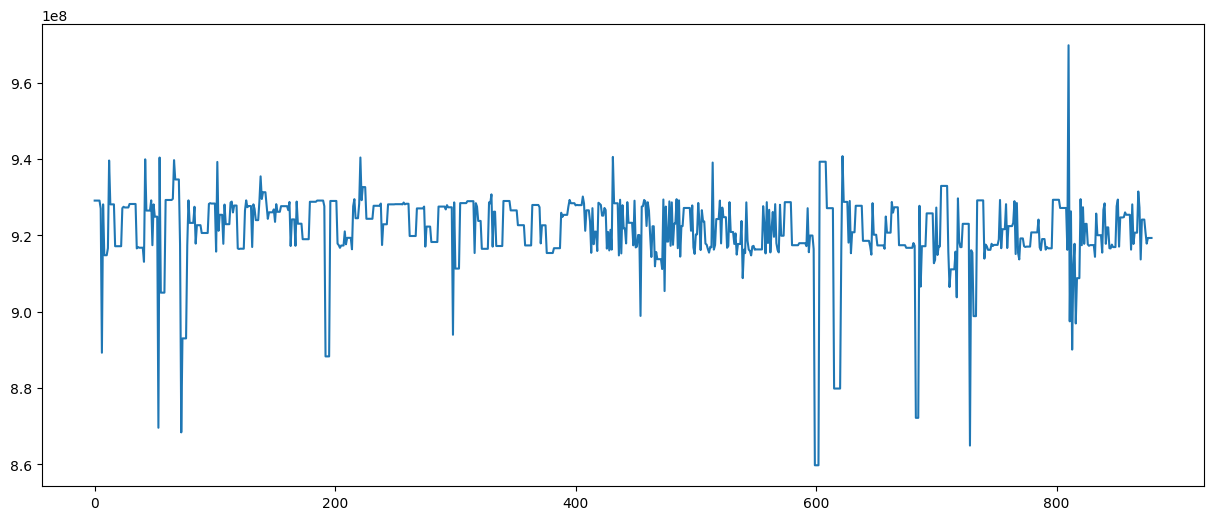

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=100)
dataset = pd.read_csv(r'D:\git\UECE-RNP-PMon2022\tratados\bbr esmond data_sem_outliers 10-18-2022.csv', usecols=[0], engine='python')
plt.plot(dataset)
plt.show()

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [65]:
#fix random seed for reproducibility
tf.random.set_seed(7)

In [66]:
#load the dataset
dataframe = pd.read_csv(r'D:\git\UECE-RNP-PMon2022\tratados\bbr esmond data_sem_outliers 10-18-2022.csv', usecols=[0], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [67]:
#normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [68]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
#30,70
#50,50
#70,30

616 264


In [69]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [70]:
#reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [71]:
#reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [72]:
#create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=150, batch_size=1, verbose=2)

Epoch 1/150
614/614 - 2s - loss: 0.0459 - 2s/epoch - 3ms/step
Epoch 2/150
614/614 - 1s - loss: 0.0055 - 510ms/epoch - 831us/step
Epoch 3/150
614/614 - 1s - loss: 0.0055 - 506ms/epoch - 824us/step
Epoch 4/150
614/614 - 1s - loss: 0.0055 - 512ms/epoch - 833us/step
Epoch 5/150
614/614 - 1s - loss: 0.0055 - 532ms/epoch - 866us/step
Epoch 6/150
614/614 - 1s - loss: 0.0055 - 525ms/epoch - 855us/step
Epoch 7/150
614/614 - 1s - loss: 0.0055 - 519ms/epoch - 845us/step
Epoch 8/150
614/614 - 1s - loss: 0.0055 - 517ms/epoch - 842us/step
Epoch 9/150
614/614 - 1s - loss: 0.0054 - 517ms/epoch - 842us/step
Epoch 10/150
614/614 - 1s - loss: 0.0055 - 514ms/epoch - 838us/step
Epoch 11/150
614/614 - 1s - loss: 0.0055 - 508ms/epoch - 827us/step
Epoch 12/150
614/614 - 1s - loss: 0.0054 - 513ms/epoch - 836us/step
Epoch 13/150
614/614 - 1s - loss: 0.0054 - 511ms/epoch - 833us/step
Epoch 14/150
614/614 - 1s - loss: 0.0055 - 515ms/epoch - 839us/step
Epoch 15/150
614/614 - 1s - loss: 0.0054 - 548ms/epoch - 892us

In [73]:
#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

9/9 [==============================] - 0s 873us/step
Train Score: 8116995.69 RMSE
Test Score: 9901904.57 RMSE


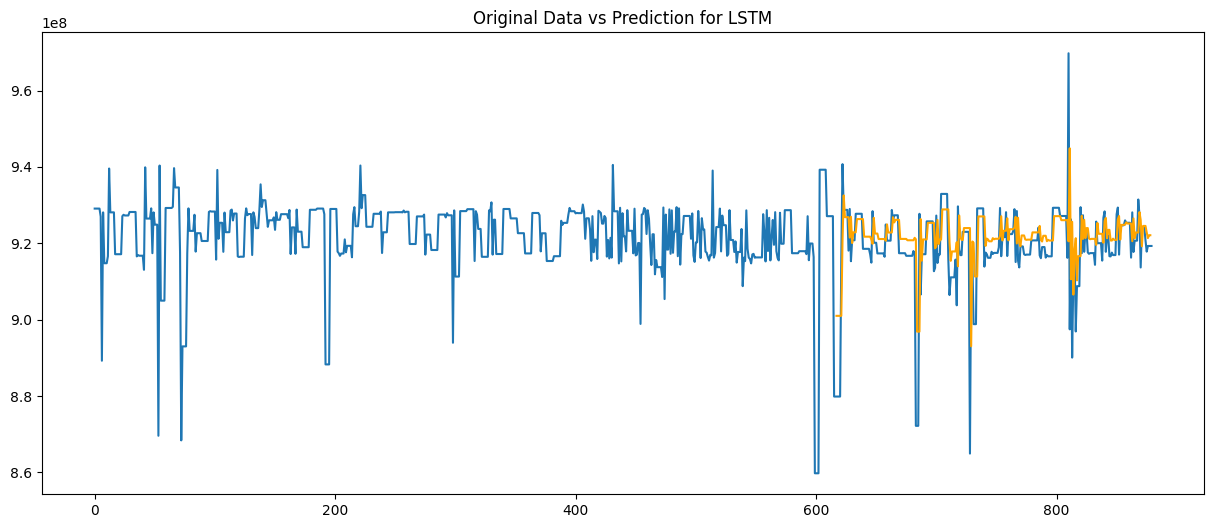

In [74]:
# shift train predictions for plotting
from turtle import color
figure(figsize=(15, 6), dpi=100)
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.title('Original Data vs Prediction for LSTM')
plt.plot(scaler.inverse_transform(dataset))
#plt.plot(trainPredictPlot, color='red')
plt.plot(testPredictPlot, color='orange')
plt.show()